# Jupyter Notebook Version for calculating Pacific Impact on Sahelian Rain Fall

In [1]:
import numpy as np  # Used later
from spy4cast import Dataset, Region, Month
from spy4cast.spy4cast import Preprocess, MCA, Crossvalidation

## Configuration

In [2]:
predictor = Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-200, lonf=-60,
           month0=Month.APR, monthf=Month.JUN,
           year0=1976, yearf=2009),
)

predictand = Dataset("cru_ts4.06.1950.2010.nc", "./datasets").open("pre").slice(
    Region(lat0=0, latf=25,
           lon0=-20, lonf=20,
           month0=Month.JUL, monthf=Month.SEP,
           year0=1976, yearf=2009),
)
#  There is a lag of 3 months (from April to July)

## Methodology

### Preprocessing

In [3]:
# First step. Preprocess variables: anomaly and reshaping
predictor_preprocessed = Preprocess(predictor, period=4, order=4, freq="high")
predictor_preprocessed.save("y_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# Save matrices as .npy for fast loading. To load use:
# predictor_preprocessed = Preprocess.load("y_", "./data-Pacific_Impact_Sahelian_Rainfall/")
predictand_preprocessed = Preprocess(predictand)
predictand_preprocessed.save("z_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# predictand_preprocessed = Preprocess.load("z_", "./data/-Pacific_Impact_Sahelian_Rainfall")

[INFO] Preprocessing data for variable sst took: 0.847 seconds
[INFO] Saving Preprocess data in `./data-Pacific_Impact_Sahelian_Rainfall/y_*.npy`
[INFO] Preprocessing data for variable pre took: 0.027 seconds
[INFO] Saving Preprocess data in `./data-Pacific_Impact_Sahelian_Rainfall/z_*.npy`


### MCA

In [4]:
# Second step. MCA: expansion coefficients and correlation and regression maps
nm = 3
alpha = 0.05
#mca = MCA(predictor_preprocessed, predictand_preprocessed, nm, alpha)
#mca.save("mca_", "./data-Pacific_Impact_Sahelian_Rainfall/")
mca = MCA.load("mca_", "./data-Pacific_Impact_Sahelian_Rainfall/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Loading MCA data from `./data-Pacific_Impact_Sahelian_Rainfall/mca_*` took 0.178 seconds


### Crossvalidation

In [5]:
# Third step. Crossvalidation: skill and hidcast evaluation and products
#cross = Crossvalidation(predictor_preprocessed, predictand_preprocessed, nm, alpha)
#cross.save("cross_", "./data-Pacific_Impact_Sahelian_Rainfall/")
cross = Crossvalidation.load("cross_", "./data-Pacific_Impact_Sahelian_Rainfall/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Loading Crossvalidation data from `./data-Pacific_Impact_Sahelian_Rainfall/cross_*` took 0.014 seconds


## Plotting results

[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/mca.png
[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/cross.png
[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/zhat_1999.png


(<Figure size 1200x1000 with 5 Axes>,
 (<GeoAxes: title={'center': 'Y on year 1999'}>,
  <GeoAxes: title={'center': 'Zhat on year 1999'}>,
  <GeoAxes: title={'center': 'Z on year 1999'}>))

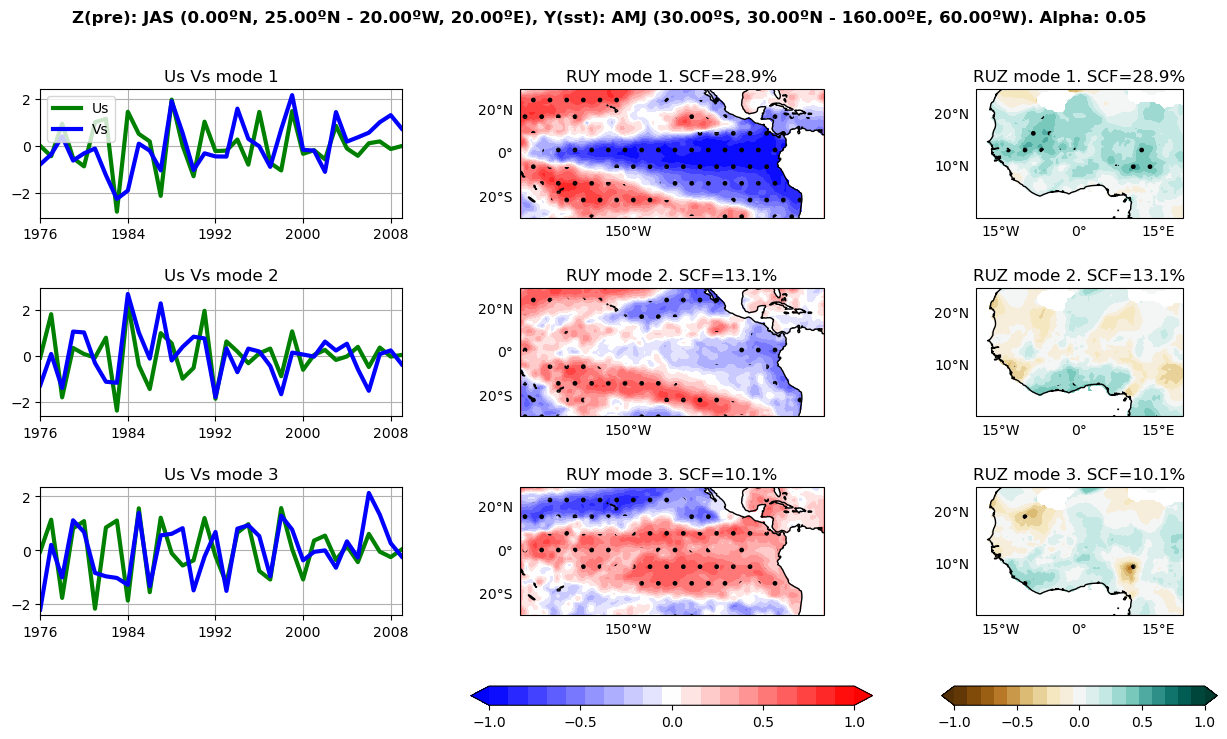

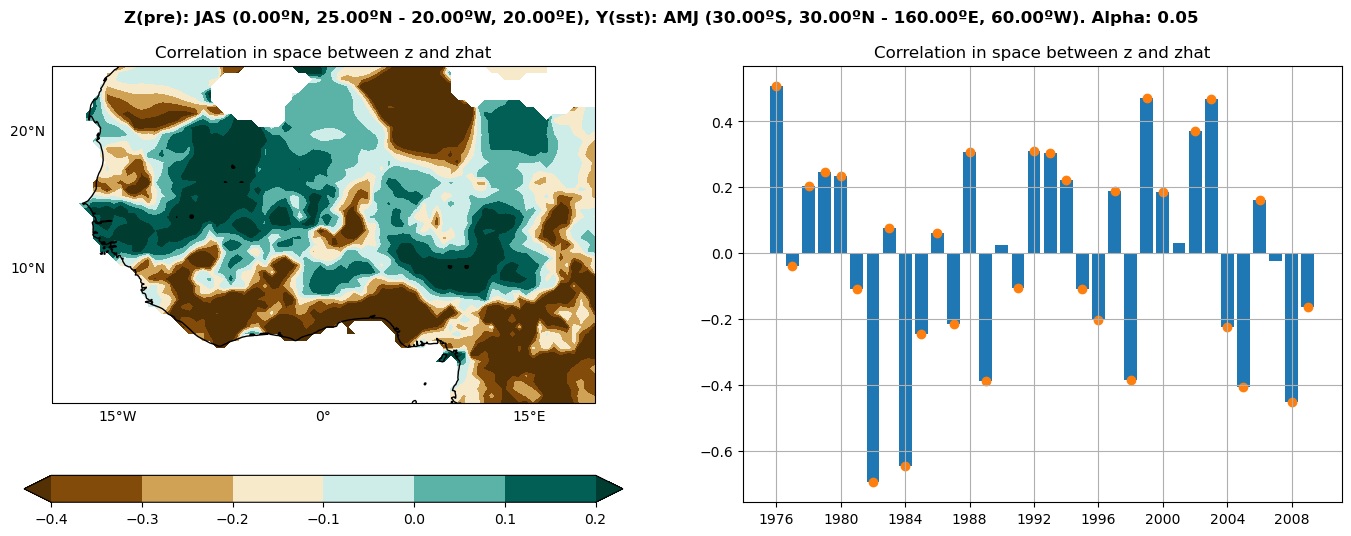

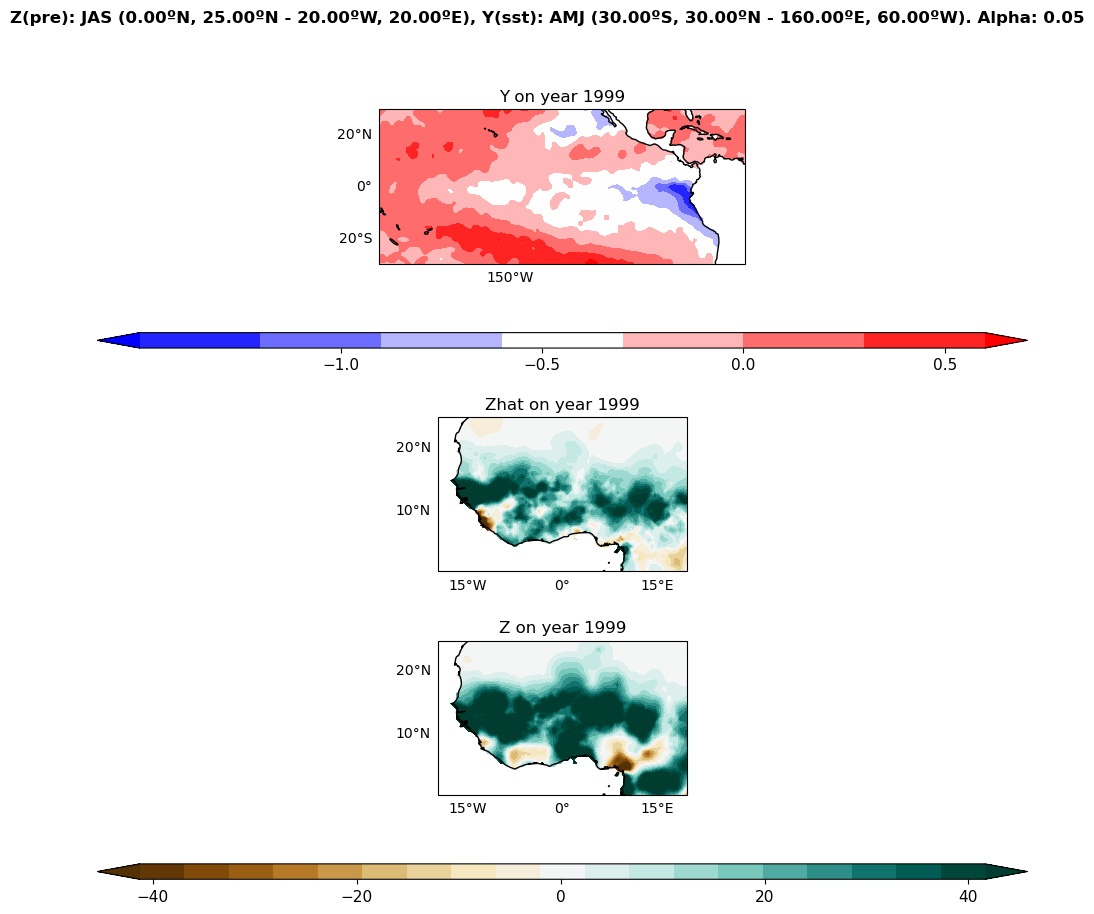

In [6]:
mca.plot(
    save_fig=True, cmap="BrBG", name="mca.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    ruy_ticks=[-1, -0.5, 0, 0.5, 1],
    ruz_ticks=[-1, -0.5, 0, 0.5, 1],
)
cross.plot(
    save_fig=True, cmap="BrBG", name="cross.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    map_ticks=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2],
    map_levels=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2],
)
cross.plot_zhat(1999, figsize=(12, 10), save_fig=True, name="zhat_1999.png", folder="./plots-Pacific_Impact_Sahelian_Rainfall/", cmap="BrBG", z_levels=np.linspace(-100, 100, 15))

[INFO] Preprocessing data for variable sst took: 0.768 seconds
[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/mca.png


((<Figure size 1700x686.679 with 11 Axes>,),
 (<Axes: title={'center': 'Us Vs mode 1'}>,
  <Axes: title={'center': 'Us Vs mode 2'}>,
  <Axes: title={'center': 'Us Vs mode 3'}>,
  <GeoAxes: title={'center': 'RUY mode 1. SCF=28.9%'}>,
  <GeoAxes: title={'center': 'RUY mode 2. SCF=13.1%'}>,
  <GeoAxes: title={'center': 'RUY mode 3. SCF=10.1%'}>,
  <GeoAxes: title={'center': 'RUZ mode 1. SCF=28.9%'}>,
  <GeoAxes: title={'center': 'RUZ mode 2. SCF=13.1%'}>,
  <GeoAxes: title={'center': 'RUZ mode 3. SCF=10.1%'}>))

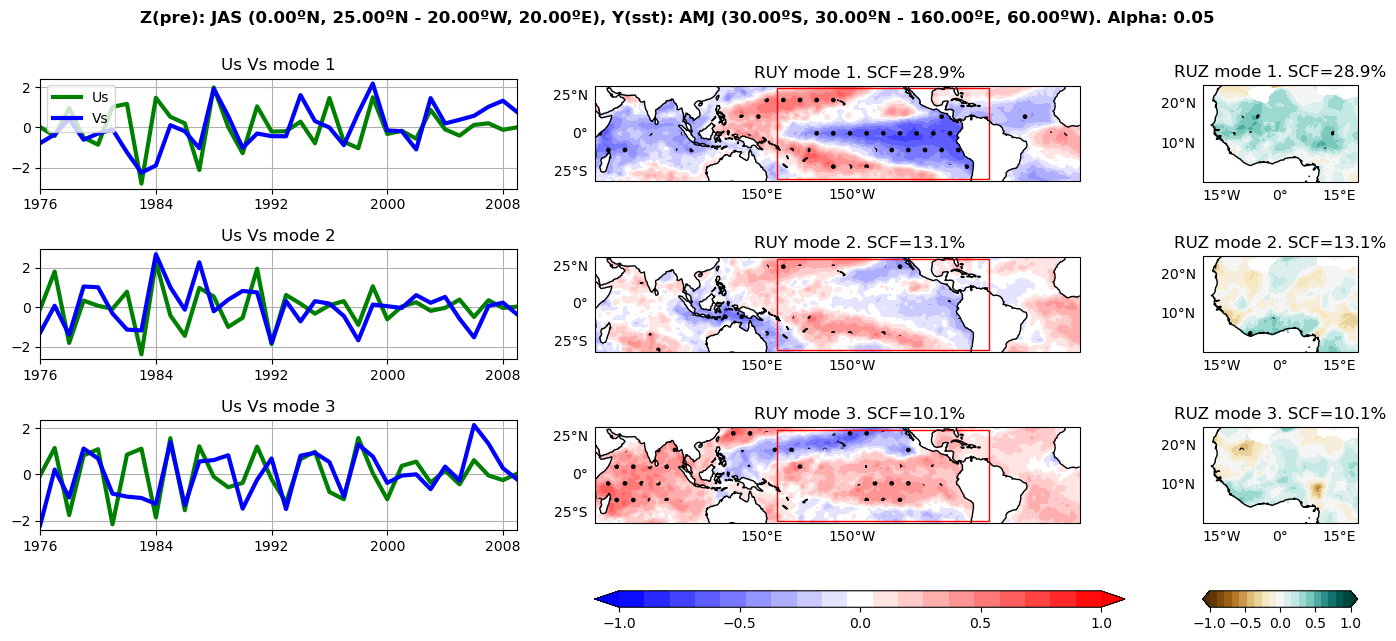

In [7]:
# Plot regression on a bigger map

map_y = Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-32, latf=32,
           lon0=-320, lonf=30,
           month0=Month.APR, monthf=Month.JUN,
           year0=1976, yearf=2009),
)

map_y_pre = Preprocess(map_y)

mca.plot(
    save_fig=True, cmap="BrBG", name="mca.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    ruy_ticks=[-1, -0.5, 0, 0.5, 1],
    ruz_ticks=[-1, -0.5, 0, 0.5, 1],
    map_y=map_y_pre)